# Home Baked

In [54]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
%autoreload 2
from BO import *

In [56]:
GPy.examples.regression.multiple_optima()

pods unavailable, see https://github.com/sods/ods for example datasets


In [57]:
def f(x):
    return np.sinc(x * 10)

def noisy_f(x):
    # x: (n, xd) -> (n, yd)
    return f(x) + np.random.randn(*x.shape) * 0.05

In [58]:
# Testing GBUCB eval size
# x: (n,d)=(2,1)
# thetas: (3,3)
# y : (2,1)
bounds = np.array([[0,1]])
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)
Y = noisy_f(X)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
GBUCB().eval(np.array([[1],[2]]), t=0, m=m, thetas=[[1,1,1], [2,2,2], [2,2,2]])

array([2.37505357, 2.9315327 ])

In [59]:
input_bounds = np.array([[0,1]])
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1.)
acq = GBUCB(beta=lambda t: 2)

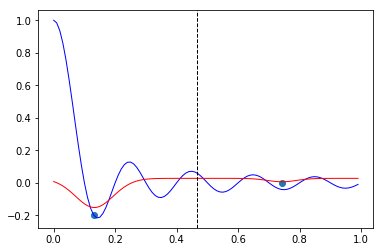

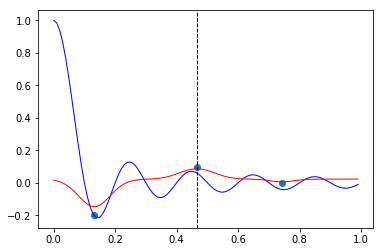

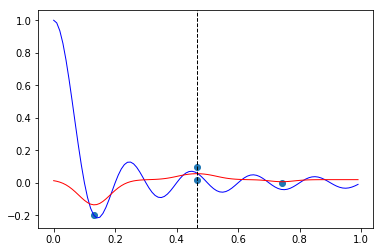

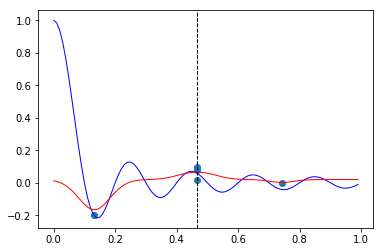

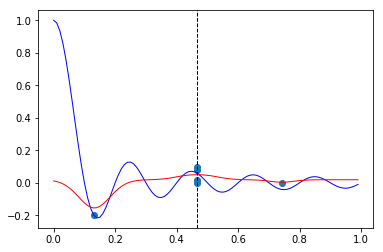

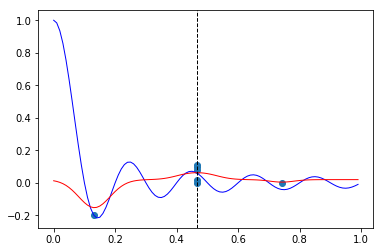

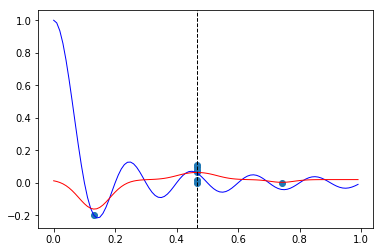

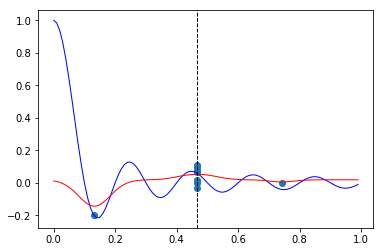

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:overflow encountered in square


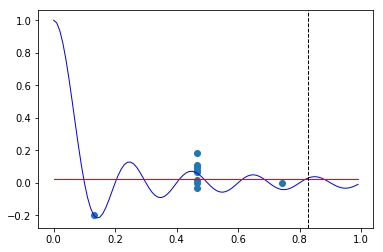

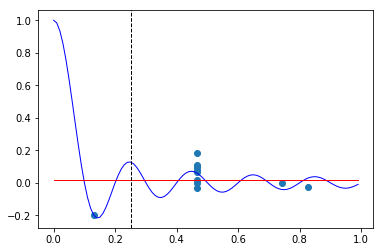

array([0.25051364])

In [62]:
bo = BO(noisy_f, kernel, acq, input_bounds, hyperparam_point_estimate=True)
bo.run(true_func=f)

reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


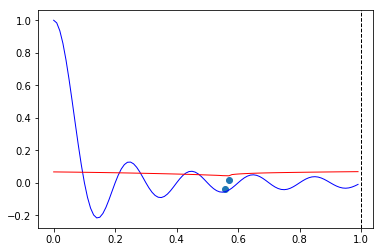

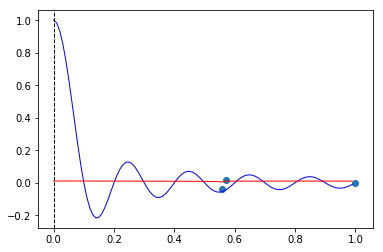

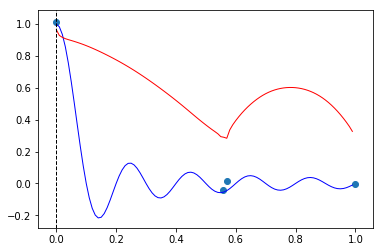

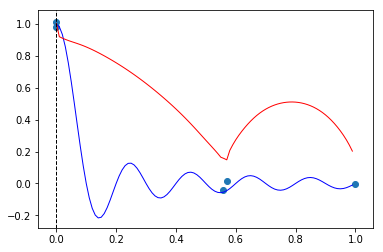

In [ ]:
bo = BO(noisy_f, kernel, acq, input_bounds, hyperparam_point_estimate=False)
bo.run(true_func=f)

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


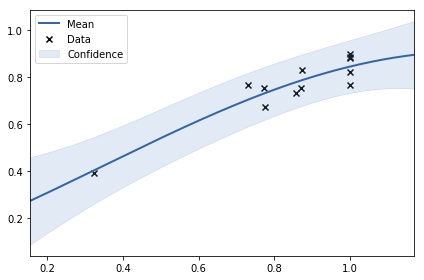

In [10]:
bo.m.optimize()
bo.m.plot()

# Spearmint